# Working with hyperspectral images

In this class we will learn briefly how to work with hyperspectral images in Python.

## Load images from MATLAB data files

If a hyperspectral image is stored as MATLAB data file (`.mat`) it can be loaded using package `scipy` which we have already installed in one of the previous classes.

In folder `dataset` there is a file `emulsion.mat` with a famous Raman spectral image of oil in water emulsion. It is saved as array with name `X`. Let's load it: 

In [1]:
# import function which lets load MATLAB data
from scipy.io import loadmat

# read the file and save the result to dictionary "d"
d = loadmat('datasets/emulsion.mat')

# check which elements this dictionary contains
d.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X'])

As you can see, indeed the dictionary contains object with name `X`. Let's extract the object and check its size assuming that it is a NumPy array:

In [2]:
img_arr = d["X"]
img_arr.shape

(60, 60, 253)

And it is indeed. As expected, the image has size of 60x60 pixels and 253 channels with Raman intensities at different wavenumbers. Let's show intensity at channel 100 as a pseudocolor image:

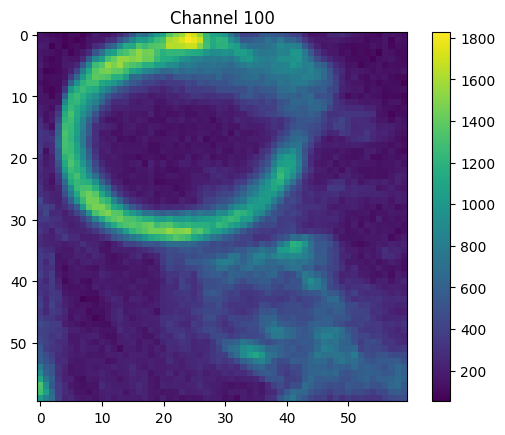

In [3]:
import matplotlib.pyplot as plt

plt.imshow(img_arr[:, :, 100])
plt.title("Channel 100")
plt.colorbar()

It works. If necessary you can reshape the image 3D array to 2D array with rows corresponding to pixels. This let's you work with the image as conventional dataset and e.g. make a line plot with spectra:

Text(0, 0.5, 'Intensity, A.U.')

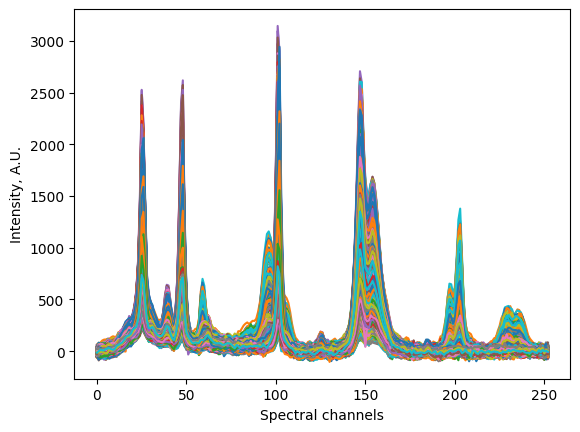

In [4]:
nrows, ncols, nchannels = img_arr.shape
npixels = nrows * ncols

X = img_arr.reshape((npixels, nchannels))

plt.plot(X.T)
plt.xlabel("Spectral channels")
plt.ylabel("Intensity, A.U.")


Let's normalize every spectrum to unit length (L2-norm):

In [6]:
import numpy as np

def l2norm(x):
    return x / np.sqrt(np.sum(x**2))

X_norm = np.apply_along_axis(l2norm, 1, X)

Let's check the intensity of the spectra to confirm the normalization:

Text(0, 0.5, 'Intensity, A.U.')

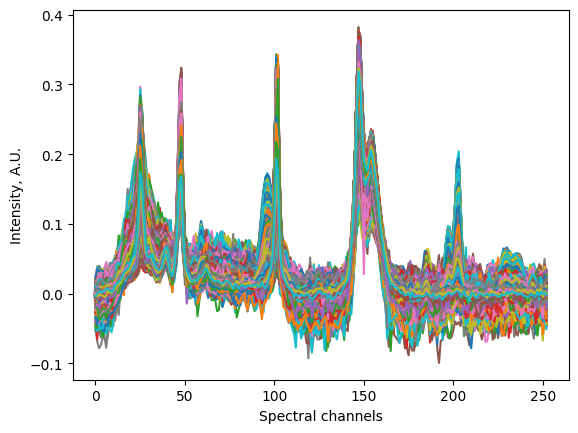

In [7]:
plt.plot(X_norm.T)
plt.xlabel("Spectral channels")
plt.ylabel("Intensity, A.U.")

Looks like this is not the best preprocessing method for this data, bit let's continue anyway and reshape the new preprocessed spectra back to spectral image and show the intensity map for channel 100 again. We will show both the original data and the preprocessed data:

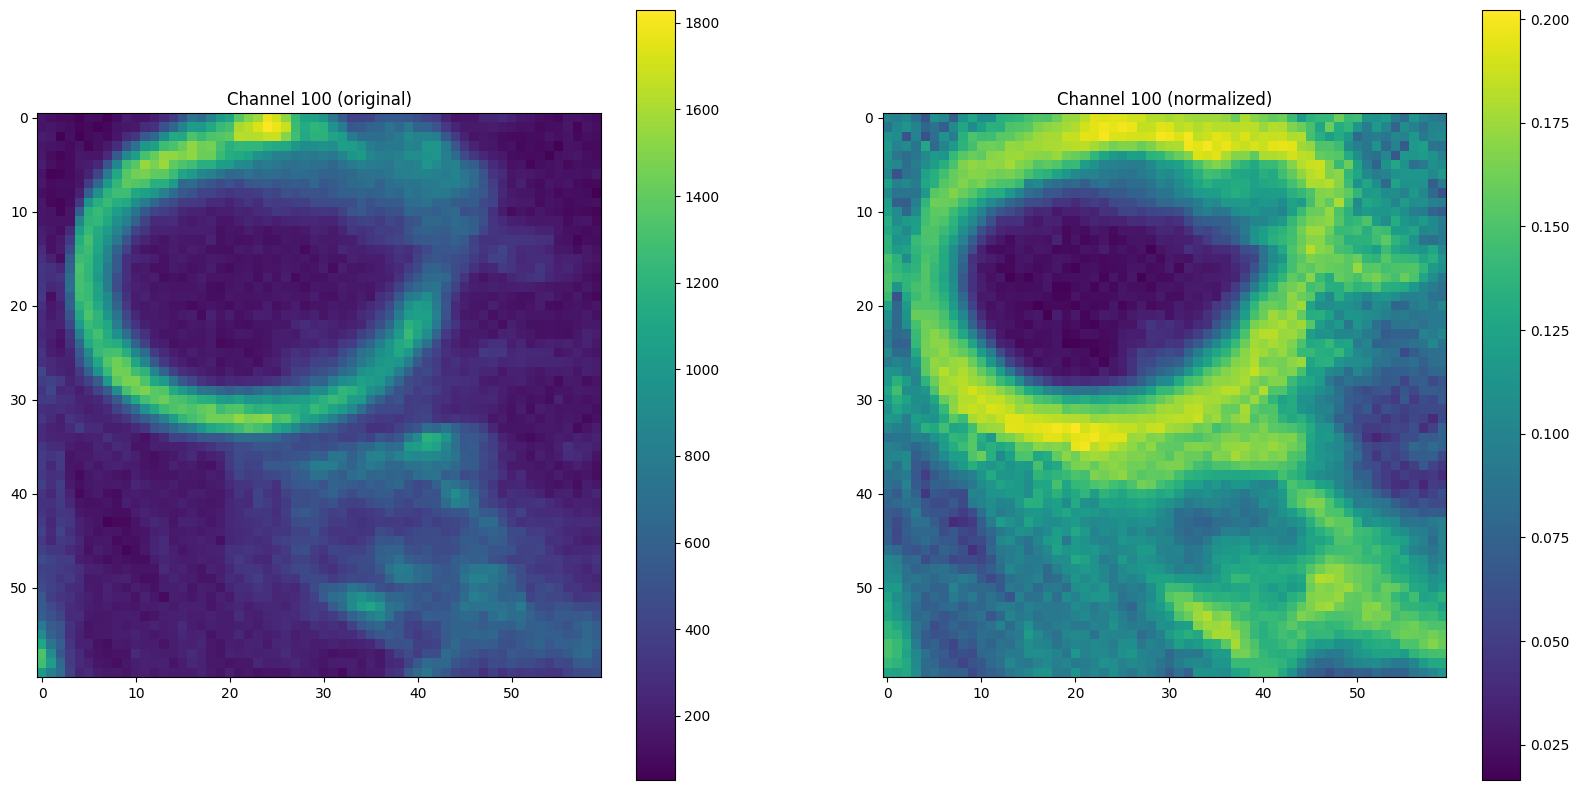

In [8]:
img_arr_norm = X_norm.reshape((60, 60, 253))

plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.imshow(img_arr[:, :, 100])
plt.title("Channel 100 (original)")
plt.colorbar()

plt.subplot(1, 2, 2)
plt.imshow(img_arr_norm[:, :, 100])
plt.title("Channel 100 (normalized)")
plt.colorbar()

I you want to apply various image transformations to the hyperspectral images there are two main options:

1. Use more advanced library Open CV which works with NumPy array directly.
2. Process every channel separately as a PIL grayscale image.

Here is an example how to use the second option to upscale the emulsion image and rotate it by 90 degrees:

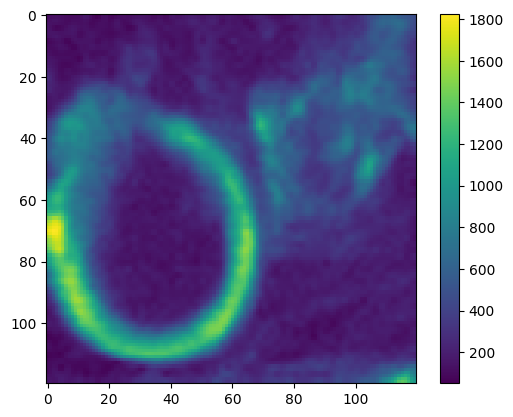

In [9]:
from PIL import Image

# get dimensions of the original image
nrows, ncols, nchannels = img_arr.shape

# compute size of new image
# because we plan to rotate it, rows and cols are swapped
# but in this case it is not needed as they are equal
ncols_new = nrows * 2
nrows_new = ncols * 2

# prepare array for the new image
img_arr_new = np.zeros((nrows_new, ncols_new, nchannels))

# loop to process each channel separately
for i in range(0, nchannels):
    img = Image.fromarray(img_arr[:, :, i])     # get the channel and convert it to PIL Image
    img = img.resize((ncols_new, nrows_new))    # resize the image
    img = img.rotate(90, expand=True)                        # rotate the image by 90 degrees
    img_arr_new[:, :, i] = np.array(img)        # convert it back to NumPy array

plt.imshow(img_arr_new[:, :, 100])
plt.colorbar()


## Working with ENVI images

In order to load hyperspectral images saved in other popular format, ENVI, we will need another library. There are several possibilities in this case:

2. [GDAL](https://gdal.org/index.html) — a translator library for raster and vector geospatial data formats.  
3. A bit outdated, but still functional and more simple package, [Spectral Python](http://www.spectralpython.net) (last release 2/10/2022).

There is also [HypeSpy](https://hyperspy.org/index.html) — a Python framework for exploring, visualizing and analyzing multi-dimensional data, which provides a lot of other possibilities in addition to simply load spectra files.

Below we will try the last simple option to get the hyperspectral data from ENVI format to NumPy array. Let's first install the library:

In [ ]:
! pip install spectral



In the folder `dataset` there is another folder with name `tablets` which contains image of tablets in ENVI format. There are three images: the one of tablet as well as the dark and the white references. Let's load, correct, and visualize it:

In [10]:
from spectral.io import envi

# open each image by providing path to header file (.hdr) and file with data values (.raw)
dark_ref = envi.open('datasets/tablets/Tablets-darkref.hdr','datasets/tablets/Tablets-darkref.raw')
white_ref = envi.open('datasets/tablets/Tablets-whiteref.hdr', 'datasets/tablets/Tablets-whiteref.raw')
img_ref = envi.open('datasets/tablets/Tablets.hdr','datasets/tablets/Tablets.raw')

# get information about spectral bands
bands = img_ref.bands.centers
bands

/opt/homebrew/lib/python3.12/site-packages/spectral/io/envi.py:175: UserWarning: Parameters with non-lowercase names encountered and converted to lowercase. To retain source file parameter name capitalization, set spectral.settings.envi_support_nonlowercase_params to True.
  warnings.warn(msg)


[1000.4,
 1006.75,
 1013.09,
 1019.44,
 1025.79,
 1032.13,
 1038.47,
 1044.82,
 1051.16,
 1057.5,
 1063.85,
 1070.19,
 1076.53,
 1082.87,
 1089.21,
 1095.55,
 1101.89,
 1108.23,
 1114.57,
 1120.91,
 1127.25,
 1133.59,
 1139.92,
 1146.26,
 1152.6,
 1158.93,
 1165.27,
 1171.6,
 1177.94,
 1184.27,
 1190.61,
 1196.94,
 1203.27,
 1209.6,
 1215.94,
 1222.27,
 1228.6,
 1234.93,
 1241.26,
 1247.59,
 1253.92,
 1260.25,
 1266.58,
 1272.9,
 1279.23,
 1285.56,
 1291.88,
 1298.21,
 1304.54,
 1310.86,
 1317.19,
 1323.51,
 1329.83,
 1336.16,
 1342.48,
 1348.8,
 1355.13,
 1361.45,
 1367.77,
 1374.09,
 1380.41,
 1386.73,
 1393.05,
 1399.37,
 1405.69,
 1412.0,
 1418.32,
 1424.64,
 1430.96,
 1437.27,
 1443.59,
 1449.9,
 1456.22,
 1462.53,
 1468.85,
 1475.16,
 1481.47,
 1487.79,
 1494.1,
 1500.41,
 1506.72,
 1513.03,
 1519.34,
 1525.65,
 1531.96,
 1538.27,
 1544.58,
 1550.89,
 1557.2,
 1563.51,
 1569.81,
 1576.12,
 1582.43,
 1588.73,
 1595.04,
 1601.34,
 1607.65,
 1613.95,
 1620.25,
 1626.56,
 1632.86,
 1

In [11]:
# load the image data and convert to NumPy array

white_img = np.array(white_ref.load())
dark_img = np.array(dark_ref.load())
img = np.array(img_ref.load())

(white_img.shape, dark_img.shape, img.shape)

((100, 320, 239), (100, 320, 239), (337, 320, 239))

As you can see, the white and dark references are obtained for 100 lines not for 337 as the original image. What we can stack several images together to meat the required size:

In [12]:
white_img_full = np.vstack((white_img, white_img, white_img, white_img[:37, :, :]))
white_img_full.shape

(337, 320, 239)

In [13]:
dark_img_full = np.vstack((dark_img, dark_img, dark_img, dark_img[:37, :, :]))
dark_img_full.shape

(337, 320, 239)

In fact it was not necessary as in this case we could simply take only first row of the dark and the white reference images, because the images was acquired using [pushbroom scanner](https://en.wikipedia.org/wiki/Push_broom_scanner).

Let's look at the images before correction:

Text(0.5, 1.0, 'Raw image')

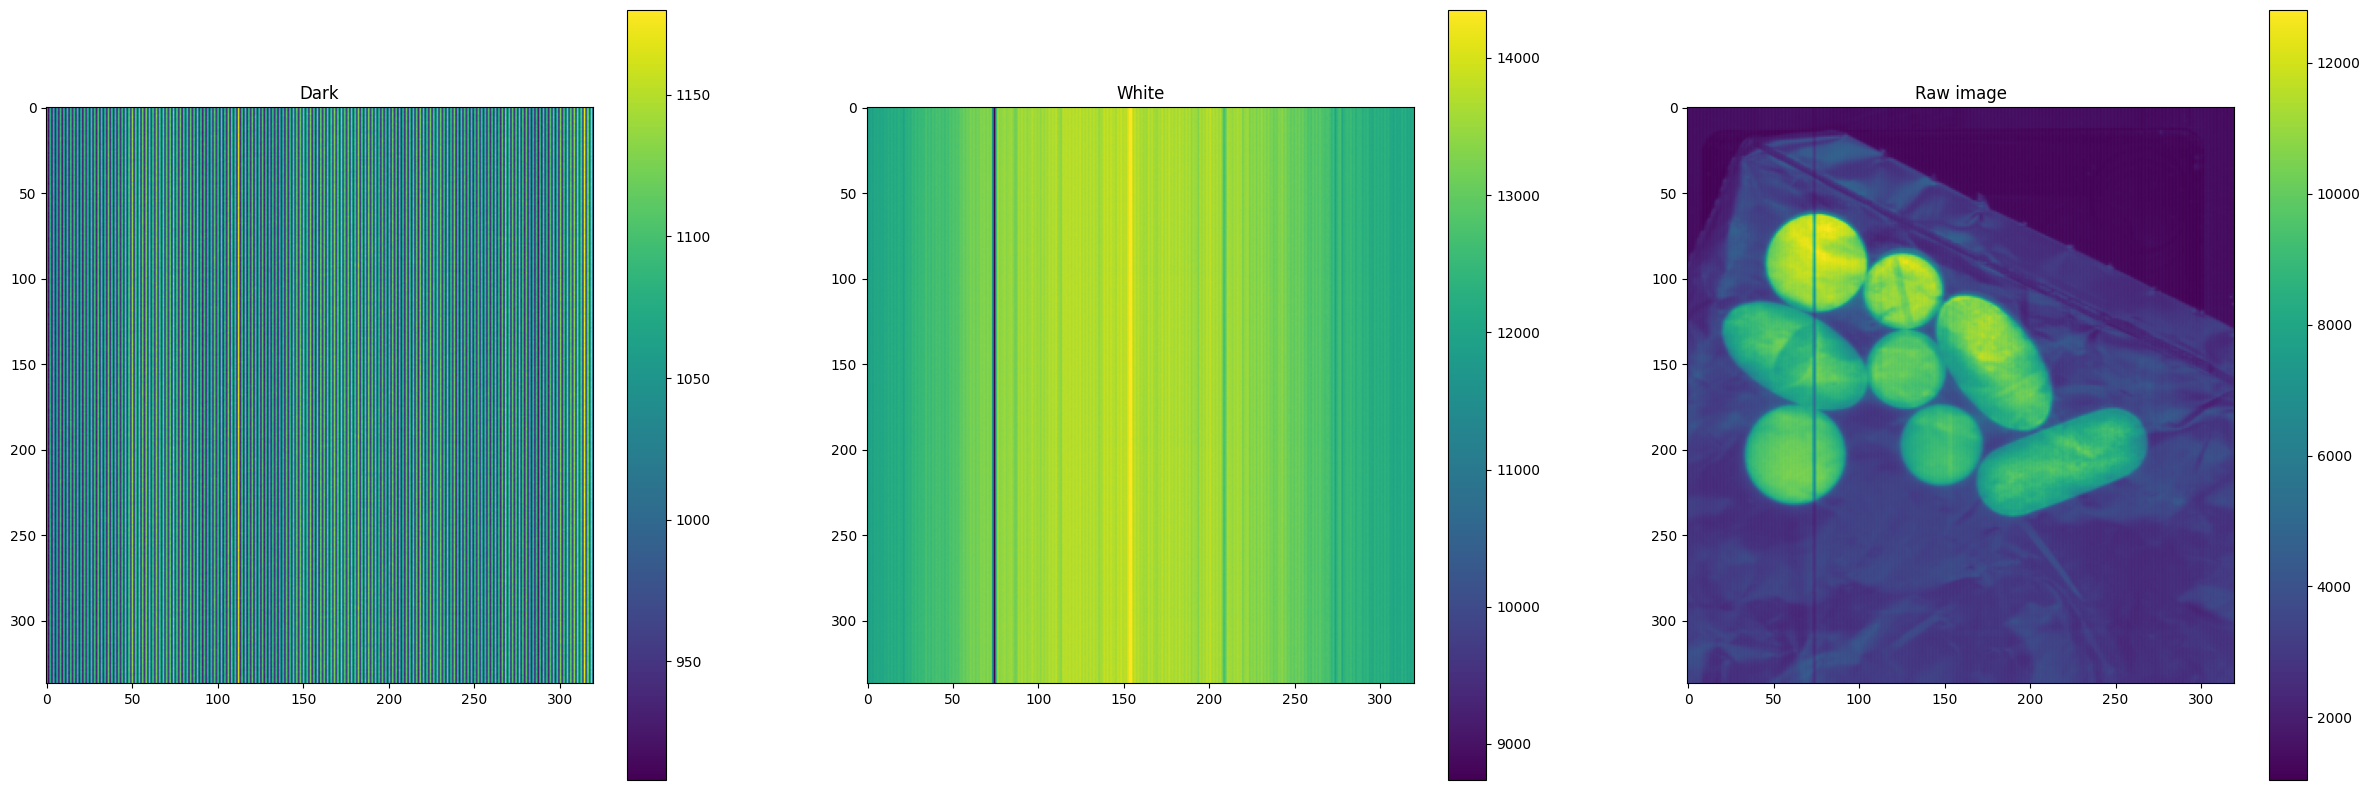

In [16]:
plt.figure(figsize=(30, 10))

plt.subplot(1, 3, 1)
plt.imshow(dark_img_full[:, :, 100])
plt.colorbar()
plt.title("Dark")

plt.subplot(1, 3, 2)
plt.imshow(white_img_full[:, :, 100])
plt.colorbar()
plt.title("White")

plt.subplot(1, 3, 3)
plt.imshow(img[:, :, 100])
plt.colorbar()
plt.title("Raw image")


Let's compute a difference between the dark and the white images and replace column with zeros by ones to avoid division by zero.

In [17]:
diff = (white_img_full - dark_img_full)
diff[diff == 0] = 1

Now we can apply correction and look at the corrected image:

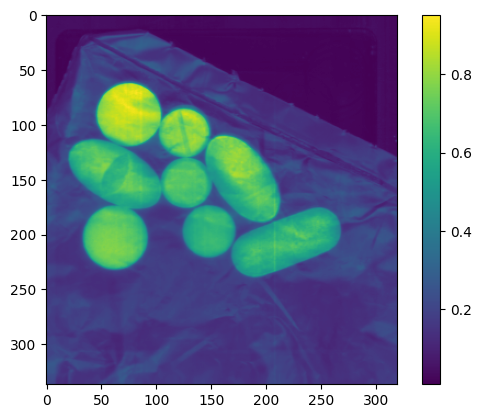

In [18]:
# correct the image by subtracting dark reference and dividing by difference between
# dark and white references
corrected_img = (img - dark_img_full) / diff

# show the image
plt.imshow(corrected_img[:, :, 100])
plt.colorbar()

Let's apply a mask:

In [19]:
mask = corrected_img[:, :, 100] > 0.4

# ! this will not work
masked_img = corrected_img * mask

ValueError: operands could not be broadcast together with shapes (337,320,239) (337,320) 

The code above is an attempt to process each channel using built in broadcasting option in NumPy, which lets avoid the loops. However it does not work because the dimension we broadcast through is the last one. We can fix this by swap the dimensions (and the return them back):

In [20]:
masked_img = corrected_img.transpose((2, 0, 1)) * mask
masked_img = masked_img.transpose((1, 2, 0))

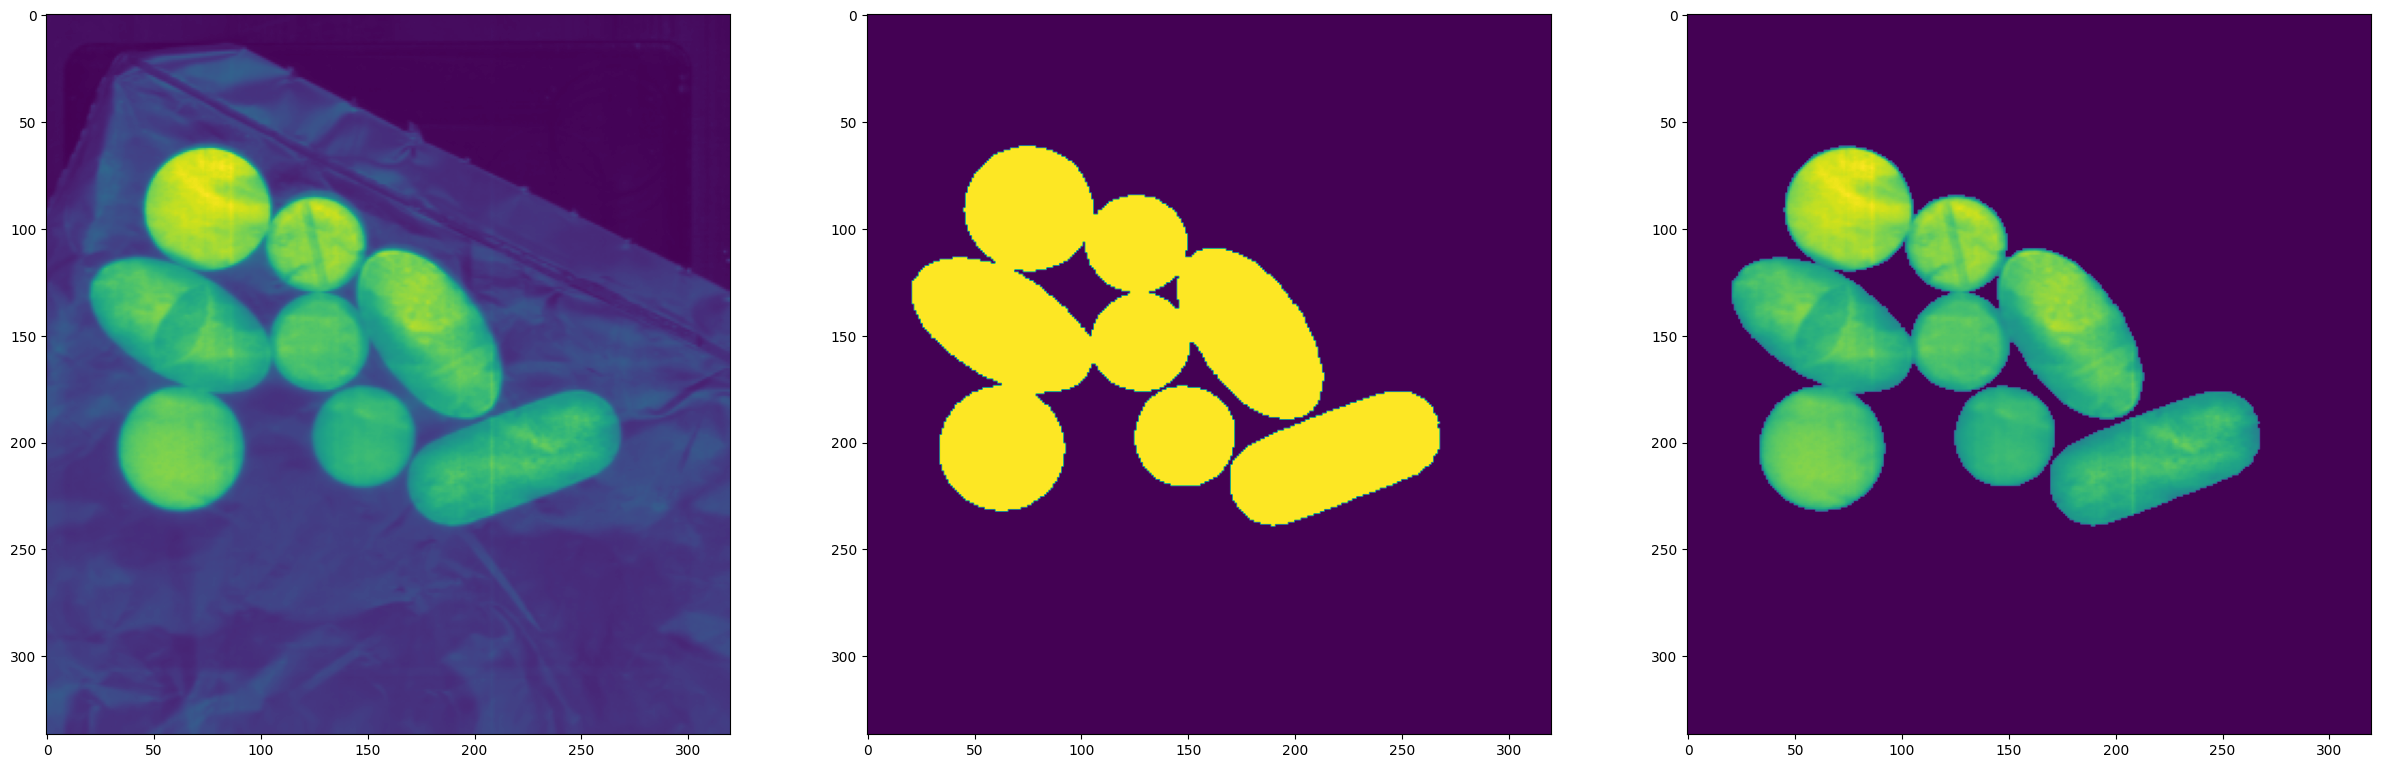

In [21]:

plt.figure(figsize=(30, 10))
plt.subplot(1, 3, 1)
plt.imshow(corrected_img[:, :, 100])
plt.subplot(1, 3, 2)
plt.imshow(mask)
plt.subplot(1, 3, 3)
plt.imshow(masked_img[:, :, 100])

That's all, folks! :)